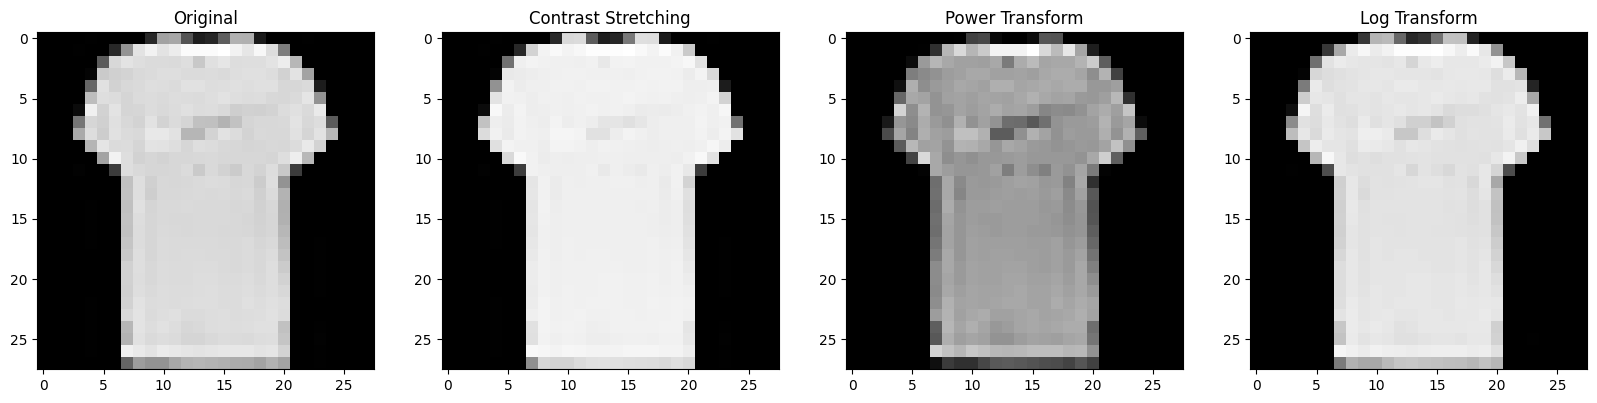

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

rownum = 10
image = train.iloc[rownum, 1:].values.reshape(28, 28).astype(np.uint8)

def contrast(image):
    s1, s2 = 80, 200
    r1, r2 = 80, 120
    result = image.copy()
    a = s1 / r1
    b = (s2 - s1) / (r2 - r1)
    g = (255 - s2) / (255 - r2)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r = image[i, j]
            if r < r1:
                s = a * r
            elif r < r2:
                s = s1 + (b * (r - r1))
            else:
                s = s2 + (g * (r - r2))
            result[i, j] = s
    return result

def power(image, gamma):
    n = image / 255.0
    transformed = np.power(n, gamma)
    return np.uint8(transformed * 255)

def log_transform(image, c):
    n = image / 255.0
    transformed = c * np.log1p(n)
    return np.uint8(transformed * 255)

cs = contrast(image)
powered = power(image, 3)
log_img = log_transform(image, 1)

plt.figure(figsize=(20, 8))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(cs, cmap='gray')
plt.title('Contrast Stretching')

plt.subplot(1, 4, 3)
plt.imshow(powered, cmap='gray')
plt.title('Power Transform')

plt.subplot(1, 4, 4)
plt.imshow(log_img, cmap='gray')
plt.title('Log Transform')

plt.show()
